In [1]:
from importlib import reload
import src.utils.utils_functions
reload(src.utils.utils_functions)

<module 'src.utils.utils_functions' from 'c:\\Users\\nouxy\\Documents\\MA3\\Applied data analysis\\Project\\GIT_PROJECT\\src\\utils\\utils_functions.py'>

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import math
import seaborn as sns
import numpy as np
import os
from pathlib import Path
from src.utils.utils_functions import *

# Part 1 Understanding and treating the data

## Part 1.1 Data conversion

The first step in our analysis is to ensure all data is represented consistently across the project. This involves converting the original **.txt** files containing ratings and reviews into **.csv** format. Each file was examined carefully, the strings were stored into dictionaries representing key data fields. More details on the conversion process and methodology can be found in **data/TxtToCsv.ipynb**

The CSV files can be found on the following link: https://drive.google.com/drive/folders/1lcRRxlPpcyAcqJzanlwcyb5Vmip0s7_D?usp=sharing
(You will need to ask for permission to see the files)

## Part 1.2 Data exploration

With the data now in a consistent format, we begin exploring deeper the datasets to understand their links and features. We learn especially that some breweries, beers, users matches between the websites. Moreover, their might be duplicates within the datasets, with some users having multiple accounts. Breweries also have duplicates: i.e a single brewery in ratebeer can correspond to up to 3 breweries in advocate. The goal of this notebook was also to look at the percentage of Nan values for the ratings, and to understand the different variables. Further explanations can be found in **data/data_understanding.ipynb**.

Furthermore an other Jupyter Notebook explores Nan values in the dataset. It is mainly a secondary file that was used to evaluate the percentage of Nan in columns of a dataframe. In there we look at the min/max value of the different grades, where we noticed that both datasets not necessarily contain the same range for their grades. More information can be found in **data/data_cleaning.ipynb**.

Some rows contain NaN values in the datasets. Since certain parts of the analysis do not require every feature, we handle missing data filtering based on the requirements of each analysis section.

## Part 1.3 Dataset merging
To enhance the robustness of the analysis, we merge data from both RateBeer and BeerAdvocate. This approach increases the number of ratings per beer enabling a higher reliability and enhancing the controversiality analysis.

The aim is to have a general dataset for users, beers, breweries and ratings. For users, breweries, ratings each one contains a new id, the old id from both datasets except for ratings. It also contains the name, location and other information. If it is match we often make a choice from which dataset to use the information, for example as two breweries in advocate are a single in ratebeer we decided to take the name of the brewery from ratebeer. We filter out the matched informations as a single one.

For ratings we have every rating of both datasets, even the one matched twice. We decided to keep them both as we noticed that comments may differ in the grading and textual description. We added columns corresponding to the new beer, user and brewery id. Certain attributes where deleted as we assumed that we could recompute them again, or if need could reload the old files. Finally we gave an id to each rating, the dataset of origin as 'rb' or 'ad', and we added a column called matched if filled with a number contains the id of the rating it is matched with.

Further information can be found add **data/merge_into_onedataset.ipynb**. The transformed data can be found at the following link:
https://drive.google.com/drive/folders/1McQ7BU24mEsEqouulOPqrmtQJ47E6ZP8?usp=sharing
(You will need to ask for permission).


**Data Loading**

For the whole the next cell calls the different datasets and is used for the rest of the notebook.

In [3]:
root = Path(os.getcwd()).parent

#Change for each one of where your data is. For me in Dataset I have all the three folders
dataset_path = os.path.join(root,'Dataset')

FULL = "full"
FULL_PATH = os.path.join(dataset_path,FULL)

breweries_df = pd.read_csv(os.path.join(FULL_PATH, 'breweries.csv'))
beers_df = pd.read_csv(os.path.join(FULL_PATH, 'beers.csv'))
users_df = pd.read_csv(os.path.join(FULL_PATH, 'users.csv'))
ratings_df = pd.read_csv(os.path.join(FULL_PATH,'ratings.csv'))

C:\Users\nouxy\AppData\Local\Temp\ipykernel_9640\4284051585.py:10: DtypeWarning: Columns (7,8) have mixed types. Specify dtype option on import or set low_memory=False.
  beers_df = pd.read_csv(os.path.join(FULL_PATH, 'beers.csv'))
C:\Users\nouxy\AppData\Local\Temp\ipykernel_9640\4284051585.py:11: DtypeWarning: Columns (5) have mixed types. Specify dtype option on import or set low_memory=False.
  users_df = pd.read_csv(os.path.join(FULL_PATH, 'users.csv'))


**Grade transformation**

We noticed during the **data_cleaning.ipynb** that the grades are not based on the same range. We decided to set the grade between 1 and 5. If the attribute is between 1 and 20 and the grade is set at 16/20 it will become (16-1)/19*4+1 = 4.15 and not 4. 1 comes from the min value of the attribute, and 19 because of the span. We decided to set it between 1 and 5 as we noticed that most attributes are graded with this range of value.

In [4]:
ratings_df = recompute_grade(ratings_df, min_grade_value = 1, max_grade_value = 5)

# Part 2 Exploring the definition of controversiality

This part aims to determine and label which beers are controversial and which are universal. To do this, we explore different aspects defining the controversiality of a beer. 

What does controversial mean : "subject of intense public argument, disagreement, or disapproval" [1]. As described, this depends on the opinions of the people. As a result, this analysis only depends on the fields the users can fulfill, namely, the different ratings : appearance, aroma, palate, taste, overall, and the textual reviews

## Part 2.1 Ratings and reviews filtering

As mentioned earlier, controversiality depends on disagreement in opinions. Beers with few ratings are more likely to show high variability (e.g. two opposing opinions). To ensure reliable insights and meaningful analysis, we exclude beers with fewer number of ratings or reviews than a specified threshold. Later, we might apply a weighting factor based on rating count to further refine the controversiality analysis, according more importance to more rated beers.

The threshold deciding wheter to keep a beer in the analysis is chosen at 10 arbitrarily.

In [5]:
# For Part 2.2, we want to have a DataFrame with the relevant features : id_beer, appearance, aroma, taste, palate, overall, ratings.
# We only keep the beer having enough ratings for a controversial analysis
beer_ratings = filter_ratings(ratings_df, threshold=10, attributes=['appearance', 'aroma', 'palate', 'taste', 'overall'])

# For Part 2.3, we want to have a DataFrame with the relevant features : id_beer, text. 
# We only keep the beer having enough reviews for a controversial analysis
beer_reviews = filter_ratings(ratings_df, threshold=10, attributes=['text'])


Pourcentage of ratings remaining after dropping rows with nan values in selected attributes: 76.65 %
Pourcentage of ratings remaining after dropping rating for which beer has too few valid ratings : 68.65 %
Pourcentage of ratings remaining after dropping rows with nan values in selected attributes: 63.41 %
Pourcentage of ratings remaining after dropping rating for which beer has too few valid ratings : 56.16 %


In [6]:
beer_ratings.sample(2)

,appearance,aroma,palate,taste,overall,id_beer
6203748,3.0,3.666667,4.0,3.666667,3.736842,1147
14302812,4.5,4.500000,4.5,4.500000,4.500000,643042


In [7]:
beer_reviews.sample(2)

,text,id_beer
11550891,"Upon opening some mild carbonation, pour is mi...",563795
11700587,12oz bottle. Pours a reddish rust amber with a...,566089


## Part 2.2 Beer attributes controversiality analysis

Controversiality can be analyzed in different manners. For now, the three following definitions are studied :

- We compute the variance of each attributes (appearance, aroma, palate, taste) for each beer, then study which attribute seems to be the most controversial by looking at the distribution of the variances.
- Knowing **overall** is the global grade given by the user, we use it to classify the beers. We compute the variance across the **overall** rating. We then classify beers as controversial/universal accoring to a certain threshold. Then, we observe which of the four attributes influences the most the overall score controversiality by looking at the distribution of the variances in each classes.
- We define for each beer which attributes is the most and least controversial looking at its variance. Then we count the number of max/min variances for all attributes. This can also be done after classification with **overall** score.

### Part 2.2.1 Features analysis controversiality

Pourcentage of ratings remaining after dropping rows with nan values in selected attributes: 56.83 %
Pourcentage of ratings remaining after dropping rating for which beer has too few valid ratings : 51.20 %


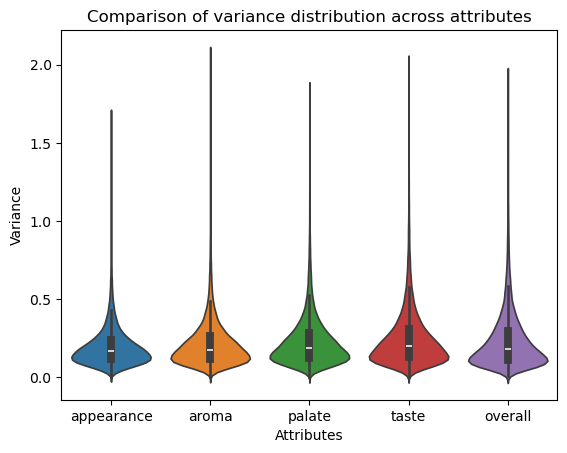

In [8]:
# Compute the variance of each attribute on each beer for beer advocate only
only_beeradvocate = filter_ratings(ratings_df[ratings_df['dataset']=='ad'], threshold=10, attributes=['appearance', 'aroma', 'palate', 'taste', 'overall'])
var_only_beeradvocate = compute_variance_per_attribute(only_beeradvocate, ['appearance', 'aroma', 'palate', 'taste','overall'])
plot_var_distrib_violin(var_only_beeradvocate)

Pourcentage of ratings remaining after dropping rows with nan values in selected attributes: 100.00 %
Pourcentage of ratings remaining after dropping rating for which beer has too few valid ratings : 88.14 %


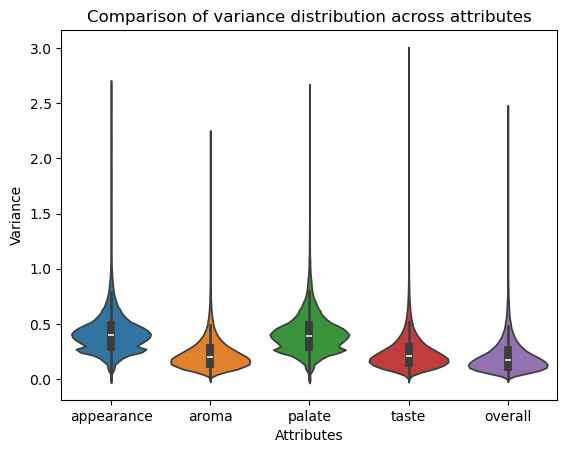

In [9]:
# Compute the variance of each attribute on each beer for rate beer only
only_ratebeer = filter_ratings(ratings_df[ratings_df['dataset']=='rb'], threshold=10, attributes=['appearance', 'aroma', 'palate', 'taste', 'overall'])
var_only_ratebeer = compute_variance_per_attribute(only_ratebeer, ['appearance', 'aroma', 'palate', 'taste','overall'])
plot_var_distrib_violin(var_only_ratebeer)

As we can see, the distribution of variance for beer advocate is pretty smooth for all attributes. However, for rate beer, appearance and palate have really strange distribution. This should be taken into account for the final labelling of the beers. 

In [10]:
# Compute the variance of each attribute on each beer for merged dataset
attributes_variance = compute_variance_per_attribute(beer_ratings, ['appearance', 'aroma', 'palate', 'taste','overall'])
attributes_variance.head(2)


,appearance,aroma,palate,taste,overall
id_beer,,,,,
1,0.441887,0.418413,0.619838,0.388112,0.370040
2,0.316176,0.238063,0.476103,0.248162,0.296012


In [11]:
attributes_variance.describe()

,appearance,aroma,palate,taste,overall
count,148861.000000,148861.000000,148861.000000,148861.000000,148861.000000
mean,0.345938,0.221807,0.357351,0.241250,0.215664
std,0.184635,0.138200,0.189208,0.156305,0.159227
min,0.000000,0.000000,0.000000,0.000000,0.004432
25%,0.215476,0.130208,0.226807,0.137673,0.110973
50%,0.330657,0.191554,0.337438,0.204752,0.173211
75%,0.446970,0.275414,0.454710,0.298469,0.270172
max,2.672727,2.226712,2.638095,2.980920,2.453291


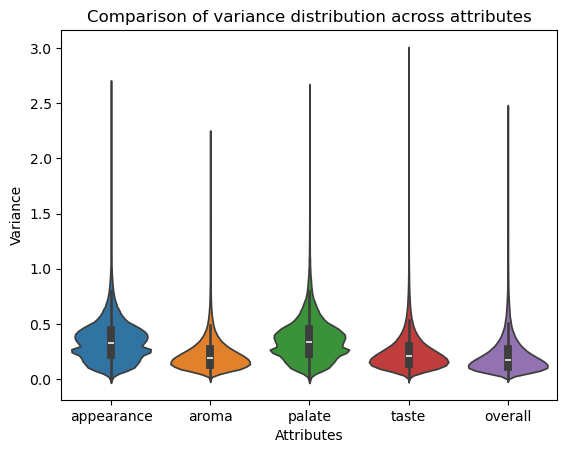

In [12]:
plot_var_distrib_violin(attributes_variance)

As we can see, we have many outliers with a really high variance. Moreover, we observe that palate and appearance have the highest mean variance. They also have a quite different distribution than others. This is due to the rate beer data. This will be further investigated.

### Part 2.2.2 Features analysis from overall controversiality

In this part, we want to try analyzing the attributes using the variance of the overall feature. We classify a beer as controversial/universal according to overall variance and then study the variance of the attributes within these class. This can be done by :
1) Defining value threshold, granting greater choice freedom
2) Selecting the highest and lowest pourcentage of the distribution of variances

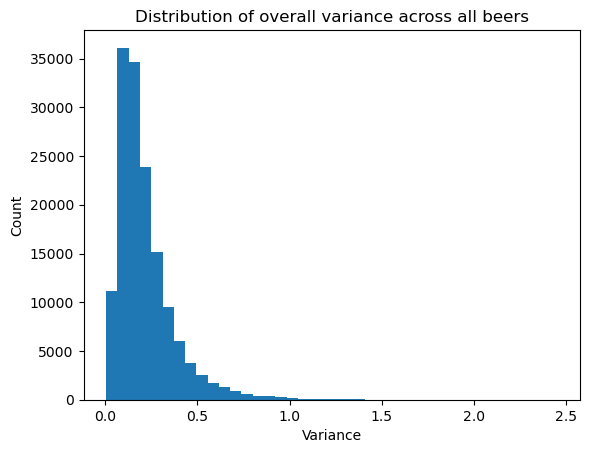

In [13]:
# Plot the distribution of variance across the beers for overall attributes
plot_overall_hist_distrib(attributes_variance['overall'])

In [14]:
# 1) Compute the variance of the 4 attributes according to the classification using overall variance score
# Threshold are decided to be 0.05 universal, 0.5 controversial, arbitrarily
[controv_attrib_var, univ_attrib_var] = classify_value_threshold(ratings_df, ['appearance', 'aroma', 'palate', 'taste'], ['overall'], 0.5, 0.05)

Percentage of beers with controversial overall variance : 5.87 %
Percentage of beers with universal overall variance : 15.44 %


In [15]:
controv_attrib_var.describe()

,appearance,aroma,palate,taste
count,35584.000000,35584.000000,35584.000000,35584.000000
mean,0.560893,0.594272,0.741131,0.764119
std,0.588327,0.556777,0.683511,0.614497
min,0.000000,0.000000,0.000000,0.000000
25%,0.223958,0.263374,0.333333,0.416667
50%,0.456596,0.472783,0.544444,0.612346
75%,0.700000,0.776449,0.932315,0.890632
max,8.000000,8.000000,8.000000,8.000000


In [16]:
univ_attrib_var.describe()

,appearance,aroma,palate,taste
count,93637.000000,93637.000000,93637.000000,93637.000000
mean,0.251617,0.096418,0.220678,0.080509
std,0.355174,0.154361,0.315494,0.116607
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.016461,0.000000,0.002315
50%,0.145833,0.065844,0.125000,0.059259
75%,0.333333,0.098765,0.333333,0.098765
max,8.000000,4.839506,8.000000,4.500000


In [17]:
# 2) # Compute the variance of the 4 attributes according to the classification using overall variance score
# Threshold is decided to be 10%, arbitrarily
[controv_attrib_var, univ_attrib_var] = classify_percentage_distribution(beer_ratings, ['appearance', 'aroma', 'palate', 'taste'], ['overall'], 10)

Percentage of beers with controversial overall variance : 10.00 %
Percentage of beers with universal overall variance : 10.00 %


In [18]:
controv_attrib_var.describe()

,appearance,aroma,palate,taste
count,14887.000000,14887.000000,14887.000000,14887.000000
mean,0.500693,0.461022,0.583989,0.552676
std,0.257740,0.203005,0.249706,0.210832
min,0.000000,0.015195,0.000000,0.051852
25%,0.312140,0.329948,0.409168,0.417094
50%,0.457409,0.426416,0.550000,0.512953
75%,0.636364,0.551003,0.711165,0.642891
max,2.672727,2.226712,2.638095,2.980920


Interesting. We learn that when a beer has a controversial overall score, palate has a higher expected variance. It is followed by taste, appearance and finally aroma.

In [19]:
univ_attrib_var.describe()

,appearance,aroma,palate,taste
count,14891.000000,14891.000000,14891.000000,14891.000000
mean,0.255835,0.103962,0.232436,0.097092
std,0.157864,0.057279,0.141515,0.046801
min,0.000000,0.000000,0.000000,0.000000
25%,0.121546,0.066907,0.104545,0.065844
50%,0.248768,0.091633,0.233333,0.088403
75%,0.354545,0.126836,0.314286,0.118805
max,1.600000,0.732481,1.155556,0.573057


When a beer has a universall overall score, appearance and palate have really high expected variance compared to others.

Looking closer at taste attribute, we see that when overall variance is high, taste variance is high. If overall variance is low, taste variance is low. As a result, taste might be the main responsible of the overall variance score

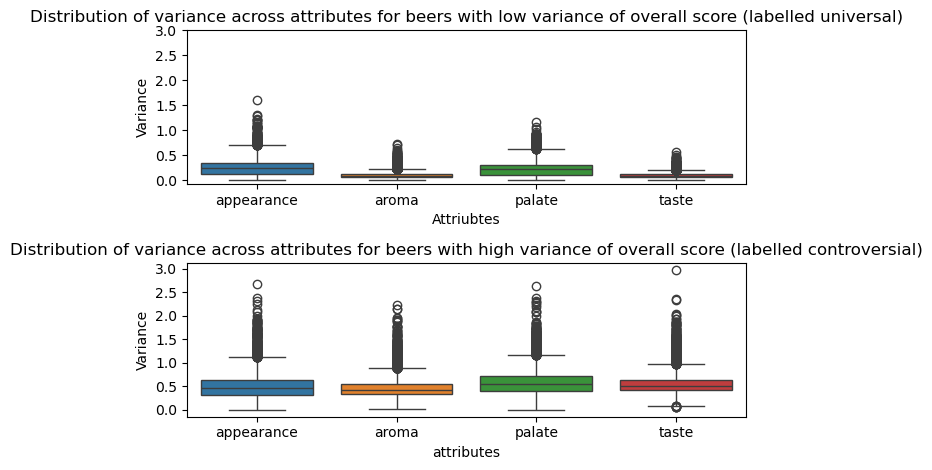

In [20]:
plot_var_boxplot(controv_attrib_var, univ_attrib_var)

Results seems to indicate that when there is strong disagreement on a beer, highest reason of this disagreement might stem from taste and palate attributes. When a beer is labeled as universal (low overall variance), it seems that appearance and palate remain high versatile scores, while aroma and taste variances are low as well.

As expected, attributes variances are positively correlated with overall variance. However, taste seems to be the most correlated one. Thus, most of the overall grade might be explained by this attribute.

### Part 2.2.3 Feature analysis from count

In [21]:
# count number of max min variance attributes
[max_var_count, min_var_count] = max_min_variance_count(attributes_variance.drop(['overall'], axis=1))


Maximal variance attribute count : palate        59995
appearance    58384
taste         19506
aroma         10976
Name: count, dtype: int64
Minimal variance attriubte count :  aroma         66105
taste         46832
appearance    23783
palate        12141
Name: count, dtype: int64


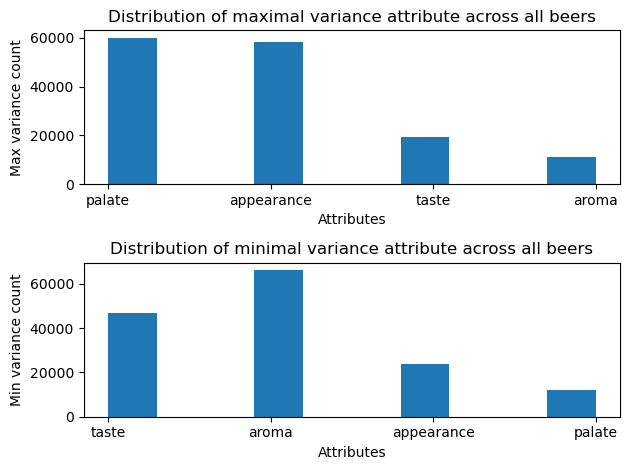

In [22]:
plot_count_max_min_variance_count(max_var_count, min_var_count, 'all')

Again, we observe that palate and appearance are the attributes having the maximal variance for most of the beers, while aroma and taste mostly have the minimal variance.

Let's try to do the same analysis but using the classification done in part 2.2.2.

In [23]:
[max_var_count, min_var_count] = max_min_variance_count(controv_attrib_var)

Maximal variance attribute count : palate        5303
taste         4672
appearance    3416
aroma         1496
Name: count, dtype: int64
Minimal variance attriubte count :  aroma         5971
appearance    5423
taste         1869
palate        1624
Name: count, dtype: int64


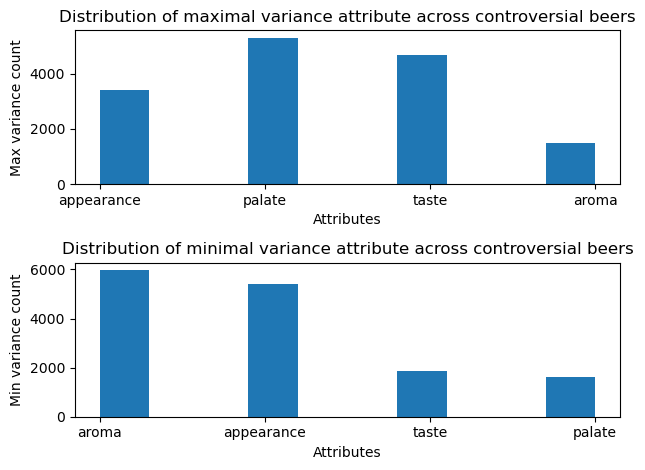

In [24]:
plot_count_max_min_variance_count(max_var_count, min_var_count, 'controversial')

For controversial beers, palate and taste have most of the time the highest variance, while aroma appearance have the lowest.

In [25]:
[max_var_count, min_var_count] = max_min_variance_count(univ_attrib_var)

Maximal variance attribute count : appearance    7634
palate        5364
aroma         1115
taste          778
Name: count, dtype: int64
Minimal variance attriubte count :  taste         6611
aroma         5885
palate        1319
appearance    1076
Name: count, dtype: int64


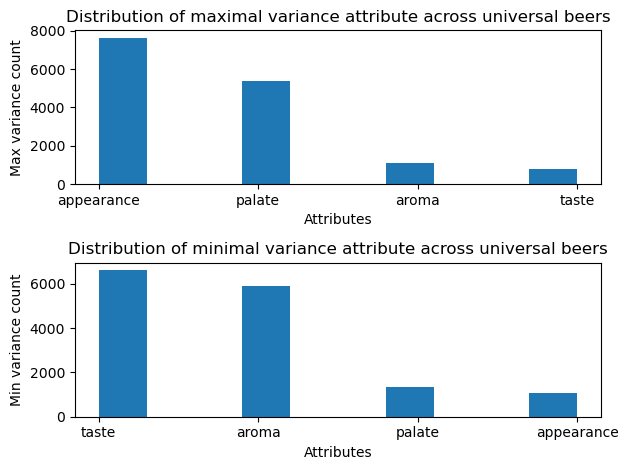

In [26]:
plot_count_max_min_variance_count(max_var_count, min_var_count, 'universal')

Finally, for universal beers, appearance and palate have the maximal variance most of the time, while taste and aroma have the lowest

Further examinations of these plots might help finding the best final way of labelling the beer as controversial or universal.

### Part 2.2.4 Correlation between the variance of the attributes

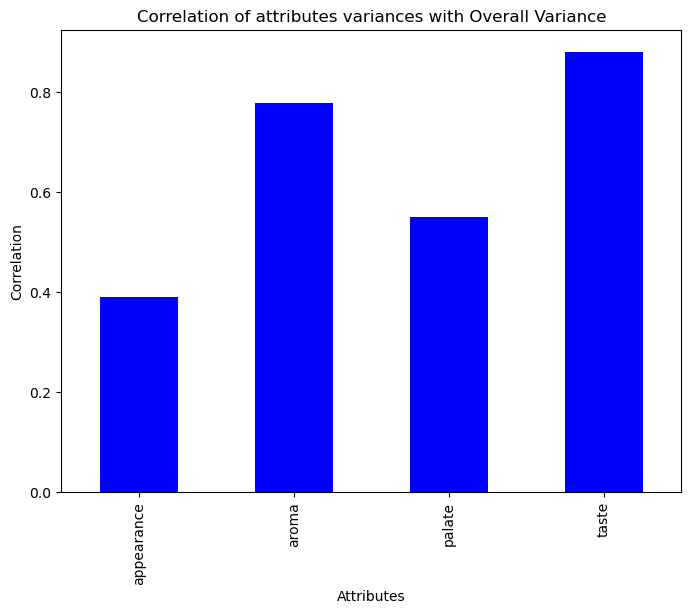

In [27]:
# Correlation of the attributes variances with overall variance
correlations = compute_correlation(attributes_variance, ['overall'])
plot_correlation(correlations)

As expected, the variance of the attributes is positively correlated with the variance of the overall score. Taste seems to be the most correlated attribute. This might suggets that it has more importance when attributing the overall grade of a beer. As a result, we might want to weight it more when deciding on the final labels of the beers

### Part 2.2.5 T test analysis on the varaiance of the attributes

We decided to test if the variance of the different attributes have a similar mean. For this we perform a T Test between the variance of each attribute, where the H0 hypothesis is that the true mean of the variance of a given attribute between the different bears are equal. H1 is that the means are different.

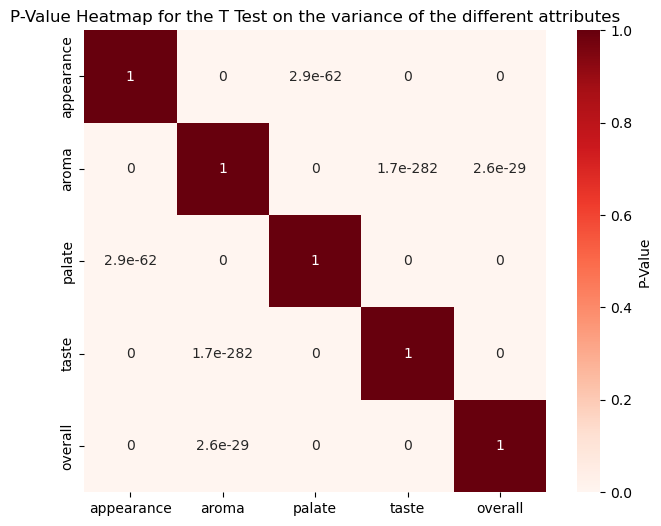

In [28]:
t_test_statistic(attributes_variance, attributes_of_interest = ['appearance', 'aroma', 'palate', 'taste','overall'])

If we choose a significance level of 0.05, we can reject H0 hypothesis every time. 

### Part 2.2.6 PCA analysis

As we saw that the variance of the attributes can relate to the controversiality of the beer, we decided to perform a Principal Component Analysis (PCA) and reduce the dimensions to 2 in hope of finding an easy threshold. We also print the eigenvalue and the eigenvector to see if a given attribute has more impact.

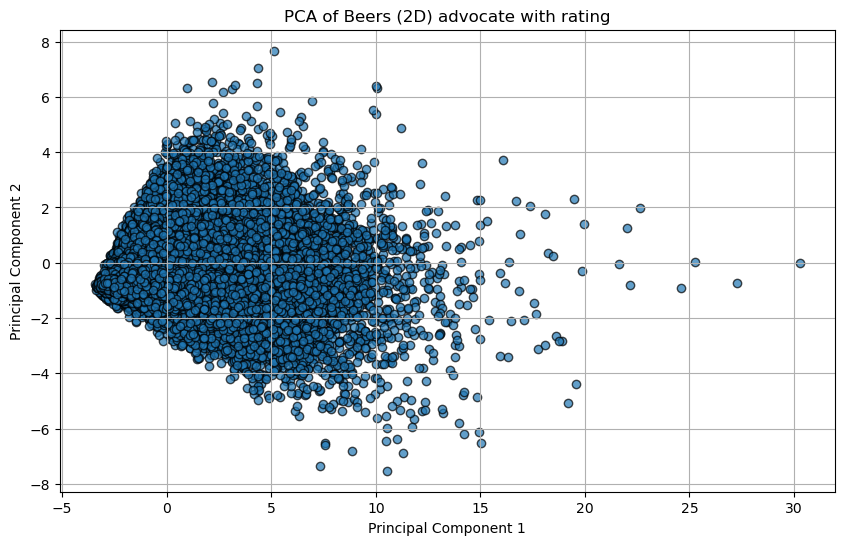

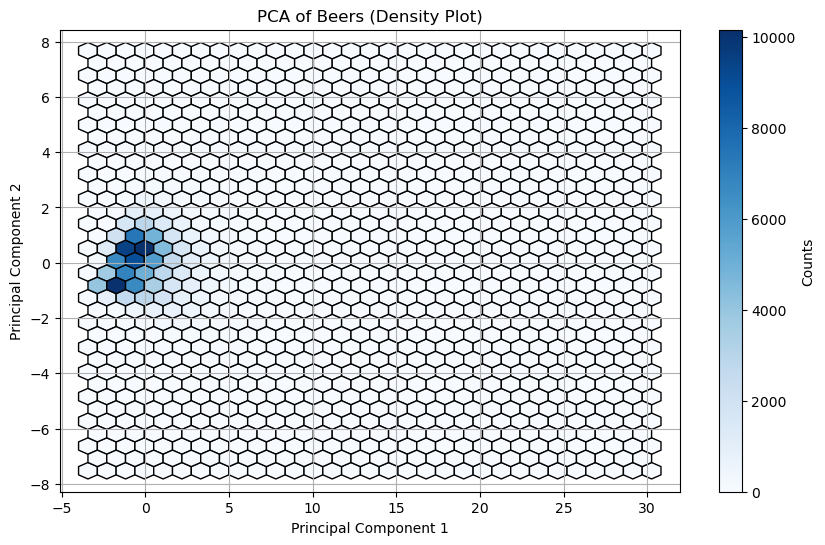

principal components: [[ 0.35388401  0.4717414   0.42252978  0.48919774  0.48412841]
 [ 0.71764756 -0.26012513  0.44760366 -0.31901397 -0.33940823]]
Explained variance [0.68237467 0.17455538]


In [29]:
PCA_plot(attributes_variance,attributes_of_interest_PCA= ['appearance', 'aroma', 'palate', 'taste','overall'])

From the plot, we see that the density is quite high at the center of the plot. Furthermore the two eigenvectors have their component quite balanced. We cannot separate easily the data in two from the PCA graph.

## Part 2.3: Analysis of the Reviews

To better understand the meaning behind the ratings we previously examined, we will conduct two types of analyses: sentiment analysis and semantic similarity analysis between relevant topics and the reviews.

### Part 2.3.1: Sentiment Analysis

We will begin by performing a sentiment analysis on the reviews. This will help us gain deeper insights when we later classify the reviews by topics. The primary objective is to identify a reliable, multilingual model. To achieve this, we will compare the performance of various models:  A [BERT base multilingual uncased model](https://huggingface.co/nlptown/bert-base-multilingual-uncased-sentiment), [Google Cloud NLP](https://cloud.google.com/natural-language/docs/analyzing-sentiment?hl=fr), [GPT-4o mini](https://openai.com/index/gpt-4o-mini-advancing-cost-efficient-intelligence/) and a 
[distilbert base multilingual cased model](https://huggingface.co/lxyuan/distilbert-base-multilingual-cased-sentiments-student).

We will compare the performance of each model on the first 6,000 reviews. We chose 6,000 reviews because it is a large enough sample for a minimally biased analysis while helping save on API credits.

Each review was labeled as Positive (1), Neutral (0), or Negative (-1).  We kept the result of this analysis in the [_sentiment_analysis.csv_](https://drive.google.com/file/d/1attiqoXvTSruf6DDXodvU7jFvLKZCOHr/view?usp=sharing) file.

In [30]:
#from utils_functions import *
#import matplotlib.pyplot as plt

In [31]:
df_sentiment = pd.read_csv("src/scripts/sentiment_analysis.csv")

We then compared the models’ performances based on exact similarity and similarity within a range of ±1. The latter is particularly relevant because it allows us to identify models that may produce false positives or false negatives.

In [32]:
[df, exact_similarity_columns, plus_minus_1_similarity_columns] = compute_similarity_scores(df_sentiment)

We decided to plot the result in the following bar plots for the exact and ±1 similarity scores across different pairs

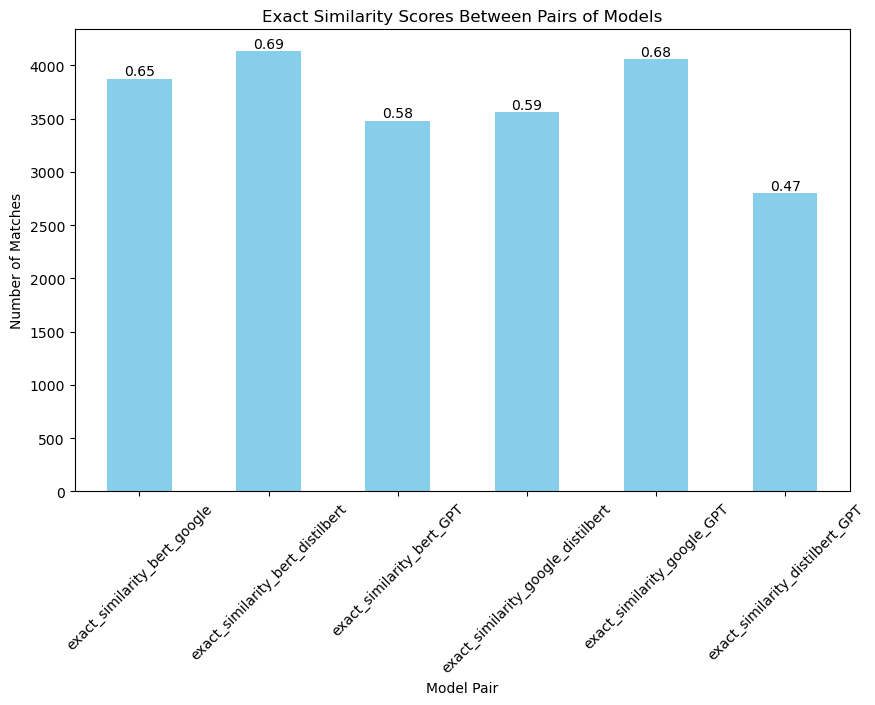

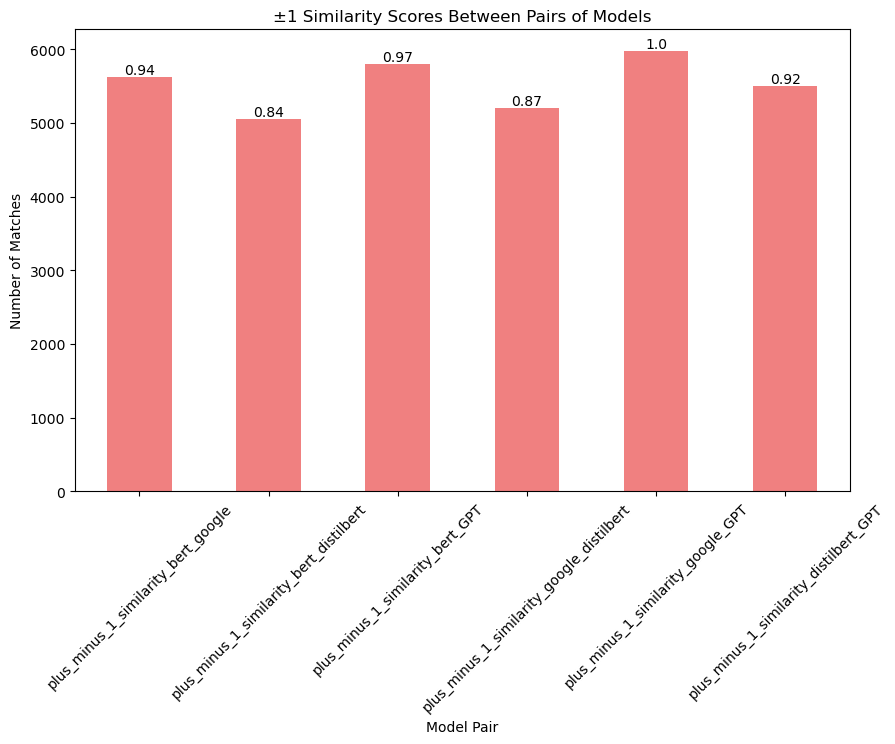

In [33]:
plot_sentiment_similarities(df, exact_similarity_columns, plus_minus_1_similarity_columns)

First, looking at the bar plots, the BERT and Distlilbert, the Google Cloud NLP and GPT-4o mini models, as well as the BERT anf Google Cloud NLP models show the highest similarity for exact sentiment, exceeding 65%.

Additionally, the Google Cloud NLP and GPT-4o mini models have nearly 100% similarity when considering a margin, followed closely by the BERT-based model and GPT-4o mini, and then by the DistilBERT model and GPT-4o mini.

Given that GPT-4o mini, the BERT model and Google Cloud NLP are very similar in the second graph, that GPT-4o mini is falling behind in the exact sentiment comparison and the DistilBERT model is behind the other models in both comparisons, we should use either Google Cloud NLP or the BERT-based model. Even though Google Cloud NLP has a slightly better similarity in both comparisons, it also an expensive api for large datasets. We will therefore use the BERT-based model for the final sentiment analysis.

### Part 2.3.2: Semantic Similarity Analysis

The next step is to identify relevant themes in the comments, such as flavor, color, and others. This, combined with sentiment analysis and an LDA model, will help us better understand why certain characteristics might be controversial.

To achieve this, we will first use an embedding model on both the reviews and the themes, and apply cosine similarity (see function below) to determine which comments are "close" to each theme.

In [34]:
def cosine_similarity(vec_a, vec_b):
    """
    Calculate the cosine similarity between two vectors.

    :param vec_a: Review vector.
    :param vec_b: Theme vector.
    :return: Cosine similarity.
    """
    dot_product = np.dot(vec_a, vec_b)
    norm_a = np.linalg.norm(vec_a)
    norm_b = np.linalg.norm(vec_b)
    return dot_product / (norm_a * norm_b) 

Finally, we will use an LDA model to generate topics that may be relevant to each theme.


The next steps are as follows :
* Assess and demonstrate the reliability of the selected embedding model.
* Evaluate and demonstrate the reliability of the chosen LDA model.
* For the controversial beers/themes, identify the most recurring topics in the reviews.
* If performance is lacking, we could consider using a summarizer as an alternative to LDA.

## Part 2.4 Which beer is controversial then ?

To continue our controversiality analysis we now need to determine which beer can be deemed controversial and which are universal.

We decided to compute a _controversiality score_ using the results from both our analysis on the feature variance and the sentiment analysis. 

### Part 2.4.1 Labelling

We used the previously mentionned _controversiality score_ to label the whole dataset. This will later allows us to determine which parameter of the beer are responsible for the controversiality

### Part 2.4.2 Statistical testing and validation

Here we will perfom statistical tests to validate our _controversiality score_.

We will first use hypothesis testing to determine if the differences over the feature variances and sentiment analysis are statistically significant. We will compare the distribution of those metrics for controversial and universal beers.

Then we will apply cross-validation, by splitting the dataset into train and validation to assert the generalisation of our score. 

# Part 3 Some reasons of controversiality

This part uses the controversiality label attributed to the beers. It tries to find patterns and reasons of controversial opinion as a function of an inherent variables of the beers: such as abv and style of the beer, location of the brewery and the users, level of expertise of the users...

## Part 3.1 Expertise analysis

In this part, we classify the users related to how many ratings they did.

- Novice are users with only a few ratings : 1-20.
- Enthusiasts are users with moderate number of ratings : 21-100
- Connoisseur are users with high nuber of ratings . 101+

It is important to note that this choice has been arbitrarily made. It could be made differently or could be interactive for the reader of the story, enabling him to label users differently according to how many ratings he thinks is enough to be a connoisseur/enthusiasts/novice.

Another essential thing to take into account is that these classes do not represent users as novice or connoisseur about **beers**, but about **rating** on each particular website.

First step is to classify the users in the three mentioned categories.

In [35]:
users_df.head(2)

,joined_advocate,old_user_id_advocate,user_name,joined_ratebeer,location,old_user_id_ratebeer,nbr_ratings_total,id
0,1.220868e+09,erzengel.248045,Erzengel,1.224324e+09,Germany,83106,8786,1
1,1.348394e+09,gendv138.695700,GenDV138,1.385723e+09,"United States, Virginia",290599,6241,2


c:\Users\nouxy\Documents\MA3\Applied data analysis\Project\GIT_PROJECT\src\utils\utils_functions.py:86: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x=category_column, palette='magma')


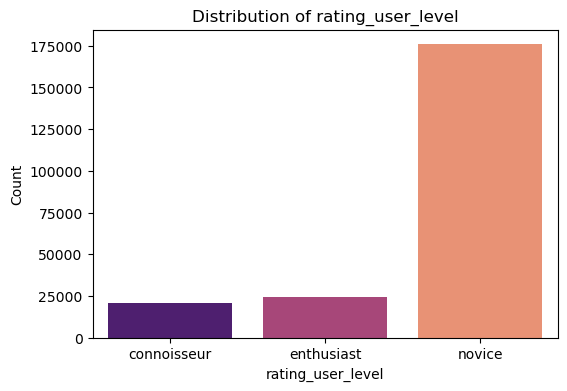

In [36]:
user_df = classify_user_rating_level(users_df, enthusiasts_level=21, connoisseur_level=101)
plot_category_distrib(user_df, 'rating_user_level')

Then, we will examine the distribution of user categories within each level of controversiality. The goal is to determine if a specific category of users has a greater impact on controversiality. This will be assessed using statistical tests such as the chi-squared test. Furthermore, we might need to balance the class distribution of the users.

We will also analyze the evolution of comments per user, focusing particularly on connoisseurs, to observe how their contribution changes over time and to see if certain user categories contribute to the controversiality of a beer.

## Part 3.2 Style of the beer and abv

In this part, we investigate the hypothesis that certain types of beers are more controversial than others.

To do so we will group the beers by style and ABV, analyzing the distribution of controversial ratings within these categories. Statistical tests will be performed to check whether controversiality is significantly associated with either of these beer characteristics. Following this, we will examine whether there are significant differences in the distribution of styles or ABV levels between controversial and non-controversial beers.

Finally, it would be interesting to explore if a specific pairing of a style and ABV could contribute to a beer's controversiality. Combining those informations could help us identify archetype (e.g a stronger lager or a very light IPA) of beers that are more polarizing among consumers, potentially revealing taste characteristics or attributes that lead to divergent opinions.

## Part 3.3 Patterns in location and ratings of local or foreign beers

In this part, we analyse the geographic factor on the controversiality of a beer. The main interest is to investigate for any local influence on the controversiality of a beer.

Using sentiment analysis on comments, we aim to investigate the relationship between the location of a beer and the location of the reviewer by examining:

<ul>
  <li>How is a user’s opinion influenced if the beer originates from their own region? Are reviewers more critical for local or foreign beers?</li>
  <li>Are there specific regions where users are generally more selective or strict (for local or foreign beers)?</li>
  <li>Are there certain combinations of user and beer regions that lead to higher controversiality?</li>
  <li>Does the importance of a particular beer style in a region influence the controversiality of other beer styles?</li>
</ul>

In addition, we will assess whether some regions show a stronger polarization (extreme positive or negative sentiments) in their ratings (overall and detailed), and we will analyze if such polarization correlates with controversiality. Similarly, we will analyse if there are combinations of regions and beer characteristic that leads to higher controversiality.

Finally, with all these data, we will try to define the "perfect" beer for each region: the one which is the less controversial. It will also be interesting to see if there are regional specificities or if beers enjoyers tends to agree worldwide.

## References

[1] : “Definition of Controversial.” *Collinsdictionary.com*, HarperCollins Publishers Ltd, 14 Oct. 2024, www.collinsdictionary.com/dictionary/english/controversial.